# CVA Calculation

### E.Ozpeynirci

#### Some Imports

In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import numpy.random as npr
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

I use standard normaly distributed random numbers generated based on a geometric brownian motion. 

In [2]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))

Here I define certain parameters. 
L is Loss level
p is probability
" a loss of 50% with a probability of 1% seeing such an event"

In [3]:
L = 0.5

In [4]:
p = 0.01

Due to the nature of default event, i simulated it via "poisson" process whether a "default" happens or not. Whenever a one default event happens then i set this to "1", otherwise to "D" at the second line.

In [5]:
D = npr.poisson(p * T, I)
D = np.where(D > 1, 1, D)

After doing a risk neutral discounting with my simulated values, i end up with a value which is close to 100. which is my initial condition. S0. This is a sanity check. 

In [6]:
np.exp(-r * T) * 1 / I * np.sum(ST)

100.1747583665661

By calculating Credit Value at Risk, is to estimate how much value is at risk due to the fact that a default is possible. i am counting the number of defaults (D) and multiply it with the loss level (L) and current simulated level (ST)

In [7]:
CVaR = np.exp(-r * T) * 1 / I * np.sum(L * D * ST)
CVaR

0.5274496972482805

This is the adjusted amount, a direct way of computing.

In [8]:
S0_CVA = np.exp(-r * T) * 1 / I * np.sum((1 - L * D) * ST)
S0_CVA

99.647308669317823

Or I simply deducted the CVaR, but i noticed there is a slight difference which might be due to the rounding???

In [9]:
S0_adj = S0 - CVaR
S0_adj

99.472550302751714

This counts the number of non-zero values which means this number of cases out of the sample size I = 100.000  * 0.01

In [10]:
np.count_nonzero(L * D * ST)

1045

at the below histogram, the major bar on the left demnstrates the data where nothing happens, and the distribution on the right demonstrates the counted default cases. 

(0.0, 175)

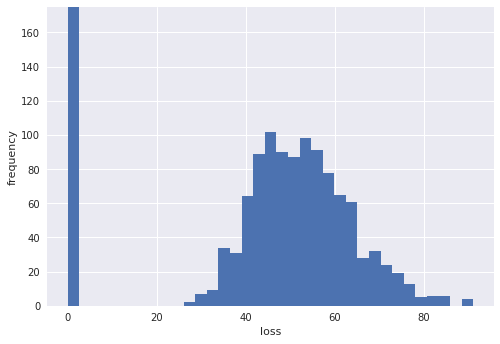

In [11]:
plt.hist(L * D * ST, bins=35)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax=175)

Now i will try to demonstrate how this adjustment may effect a simple european call option price.

In [12]:
K = 100.
hT = np.maximum(ST - K, 0)
C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
C0

10.596605829107951

In [13]:
CVaR = np.exp(-r * T) * 1 / I * np.sum(L * D * hT)
CVaR

0.059636308257163387

In [14]:
C0_CVA = np.exp(-r * T) * 1 / I * np.sum((1 - L * D) * hT)
C0_CVA

10.536969520850786

we have fewer losses than before. due to the fact that in some cases the option expires worthless so the credit risk bearer do not care whether the option seller defaults or not. here hT represents the payoff at maturity.

In [15]:
np.count_nonzero(L * D * hT)  # number of losses

602

In [16]:
np.count_nonzero(D)  # number of defaults

1045

In [17]:
I - np.count_nonzero(hT)  # zero payoff

43757

Below is the visualization and notice that the distribution looks different. It is not normal anymore. 

(0.0, 350)

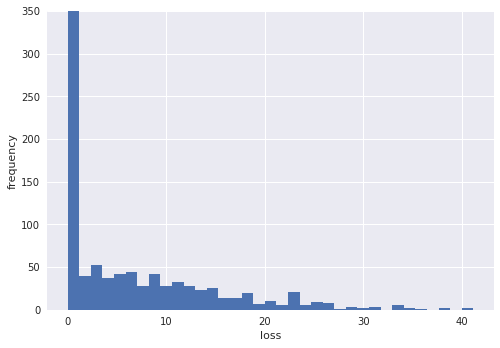

In [18]:
plt.hist(L * D * hT, bins=35)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax=350)